 # <span style='color :steelblue;font-size:35px' >Unsupervised Project</span> 

 # <span style='color :steelblue;font-size:25px' >PART-4</span>

### DOMAIN: Sports management 
- **CONTEXT:** Company X is a sports management company for international cricket. 
- **DATA DESCRIPTION:** The data is collected belongs to batsman from IPL series conducted so far. Attribute Information: 
  1. Runs: Runs score by the batsman
  2. Ave: Average runs scored by the batsman per match
  3. SR: strike rate of the batsman
  4. Fours: number of boundary/four scored
  5. Six: number of boundary/six scored
  6. HF: number of half centuries scored so far
- **PROJECT OBJECTIVE:** Goal is to build a data driven batsman ranking model for the sports management company to make business decisions.
- **Steps and tasks:**
  1. EDA and visualisation: Create a detailed performance report using univariate, bi-variate and multivariate EDA techniques. Find out all possible hidden patterns by using all possible methods.
  2. Build a data driven model to rank all the players in the dataset using all or the most important performance features.

## 1. Import and warehouse data:

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats

#for visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline

#color change for print statement etc.
from colorama import Fore
from sklearn.decomposition import PCA

import warnings as wn
wn.filterwarnings('ignore')

## Load dataset

In [2]:
ipl_data = pd.read_csv("Part4 - batting_bowling_ipl_bat.csv")

### Check the shape and Size of the Datasets

In [3]:
#check the sample data for the dataframe
print('Shape of ipl data:',ipl_data.shape)
ipl_data.head()

Shape of ipl data: (180, 7)


,Name,Runs,Ave,SR,Fours,Sixes,HF
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CH Gayle,733.0,61.08,160.74,46.0,59.0,9.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,G Gambhir,590.0,36.87,143.55,64.0,17.0,6.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- **There are 180 rows and 7 columns are there in data set.Also looks like many null columns are there in dataset.**

## 2.Data cleansing:

In [4]:
# Also we can use info to check the data types and other details of data
ipl_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    90 non-null     object 
 1   Runs    90 non-null     float64
 2   Ave     90 non-null     float64
 3   SR      90 non-null     float64
 4   Fours   90 non-null     float64
 5   Sixes   90 non-null     float64
 6   HF      90 non-null     float64
dtypes: float64(6), object(1)
memory usage: 10.0+ KB


- **As we can check from the info there are 90 rows from each variable have not null data.**
- **Except Name all are numeric in nature.**

### Check the missing value:

In [5]:
#check if any column have missing value
#Fucniton to check the missing value
def missing_val(data_frame):
    nullchecksr = data_frame.isnull().sum()
    
    if ((nullchecksr.values > 0).any()):
        print('Missing values list:\n')
        print(nullchecksr[nullchecksr.values > 0])
    else:
        print('There is no missing value found.')

In [6]:
#check if any missing value
missing_val(ipl_data)

Missing values list:

Name     90
Runs     90
Ave      90
SR       90
Fours    90
Sixes    90
HF       90
dtype: int64


- **90 rows have missing data from each variable.**
- **Also i analyize the csv file 90 rows only have not null data points and rest 90 rows all field have null value.**

### Drop the missing rows data

In [7]:
##Handling of missing value
ipl_data = ipl_data.dropna()

In [8]:
#check if any missing value
missing_val(ipl_data)

There is no missing value found.


- **There is no missing value now in data set.**

In [9]:
#check the sample data for the dataframe
print('Shape of ipl data:',ipl_data.shape)
ipl_data.head()


Shape of ipl data: (90, 7)


,Name,Runs,Ave,SR,Fours,Sixes,HF
1,CH Gayle,733.0,61.08,160.74,46.0,59.0,9.0
3,G Gambhir,590.0,36.87,143.55,64.0,17.0,6.0
5,V Sehwag,495.0,33.00,161.23,57.0,19.0,5.0
7,CL White,479.0,43.54,149.68,41.0,20.0,5.0
9,S Dhawan,569.0,40.64,129.61,58.0,18.0,5.0


- **Now we can see there are 90 rows, without not null column.**

### Check is there is any duplicate data in data set

In [10]:
#drop duplicate if any
ipl_data = ipl_data.drop_duplicates()

In [11]:
print('Shape of ipl data:',ipl_data.shape)

Shape of ipl data: (90, 7)


- After duplicate removal, still we have 90 rows. It means no duplicate rows in data set.

## 3.Check the distribution of the data

### Check the Descriptive Statistics

In [12]:
#use describe funciton to check the descriptive statistics of the numberical variables
ipl_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Runs,90.0,219.933333,156.253669,2.00,98.000,196.500,330.7500,733.00
Ave,90.0,24.729889,13.619215,0.50,14.665,24.440,32.1950,81.33
SR,90.0,119.164111,23.656547,18.18,108.745,120.135,131.9975,164.10
Fours,90.0,19.788889,16.399845,0.00,6.250,16.000,28.0000,73.00
Sixes,90.0,7.577778,8.001373,0.00,3.000,6.000,10.0000,59.00
HF,90.0,1.188889,1.688656,0.00,0.000,0.500,2.0000,9.00


### Observartion:
- min run 2 and max is 733. Standard deviation is high, so the data have more vairiation.
- average run most of bats man between 14 to 34.
- Strike rate varied from nearly 95 to 145 for most of bats man.
- some of bats man not hitten any four, six and also half century.
- few bats man have high no.of four and six.

In [13]:
#function for histplot
def hist_plot(df, col, sub_pos):    
    if(sub_pos == 1):
        plt.figure(figsize=(25,6))  
        colr = 'green'
    elif(sub_pos == 2):
        colr = 'blue'
    else:
        colr = 'purple'
        
    plt.subplot(1, 3, sub_pos)
    sns.histplot(df[col], kde= True, color=colr, edgecolor = 'black');

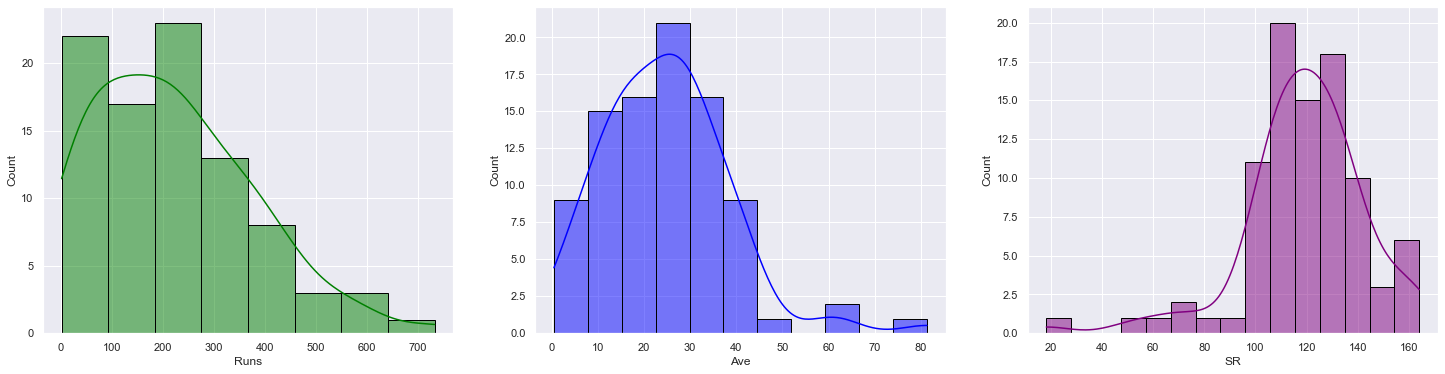

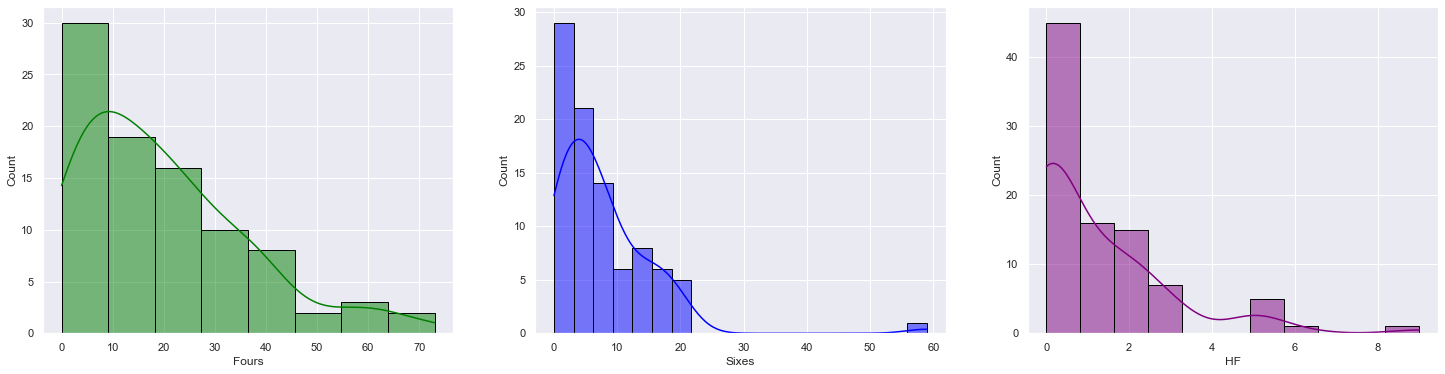

In [14]:
hist_plot(ipl_data, 'Runs', 1)
hist_plot(ipl_data, 'Ave', 2)
hist_plot(ipl_data, 'SR', 3)

hist_plot(ipl_data, 'Fours', 1)
hist_plot(ipl_data, 'Sixes', 2)
hist_plot(ipl_data, 'HF', 3)

### Observation:
- As we can see from above graph most of data is right skewed except SR.
- Also looks like most of data hve some outliers.

### Bivariate analysis

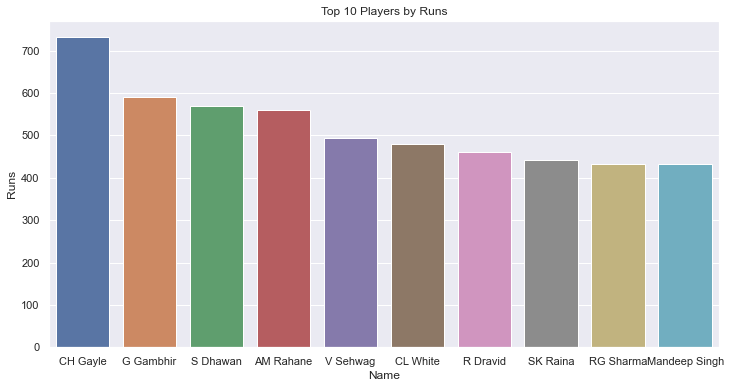

In [15]:
plt.figure(figsize=(12,6))
dataSports1=ipl_data.groupby('Name')['Runs'].sum().sort_values(ascending = False ).head(10)
dataSports1= dataSports1.reset_index() 
dataSports1.columns = ['Name' ,'Runs']
sns.barplot(data= dataSports1 , x= 'Name' , y ='Runs');
plt.title("Top 10 Players by Runs");

- **CH Gayle is the highest scoers(more than 700 runs), followed by "G Gambhir", "S Dhawan" and so on.**

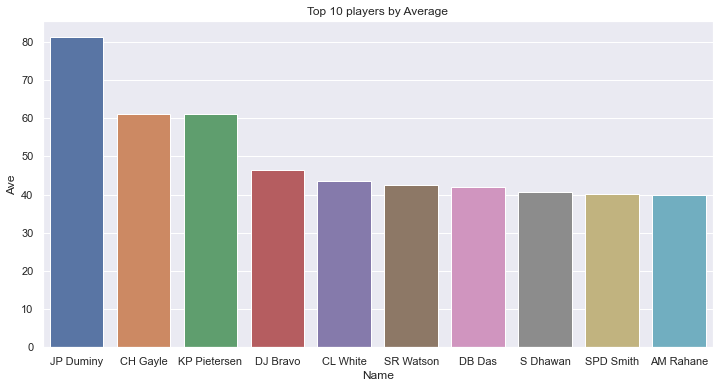

In [16]:
# Top 10 Player by Average
plt.figure(figsize=(12,6))
dataSports1=ipl_data.groupby('Name')['Ave'].sum().sort_values(ascending = False ).head(10)
dataSports1= dataSports1.reset_index() 
dataSports1.columns = ['Name' ,'Ave']
sns.barplot(data= dataSports1 , x= 'Name' , y ='Ave')
plt.title("Top 10 players by Average");

- **JP duminy average is higher followed by CH Gales, KP Pietersen so on.**

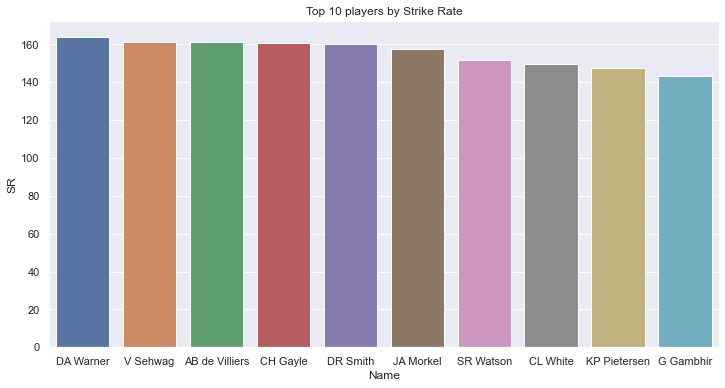

In [17]:
plt.figure(figsize=(12,6))
dataSports1=ipl_data.groupby('Name')['SR'].sum().sort_values(ascending = False ).head(10)
dataSports1= dataSports1.reset_index() 
dataSports1.columns = ['Name' ,'SR']
sns.barplot(data= dataSports1 , x= 'Name' , y ='SR')
plt.title("Top 10 players by Strike Rate");

- **DA Warner Stirke Rate is higher more than 160 followed by V Sehwag, AB de Villiers so on.**
- **Top tem bats man strike rate not vary much, its beween 140 to 165.**

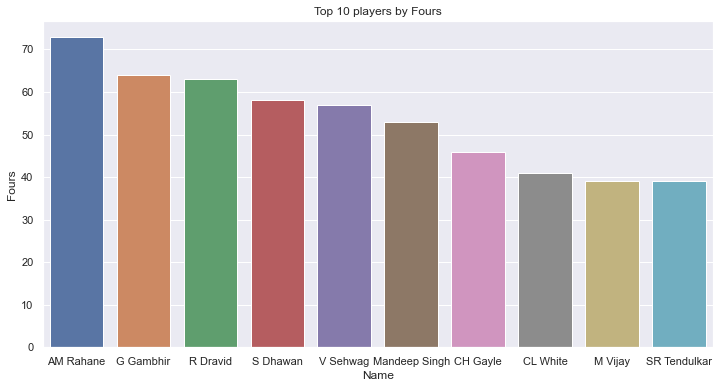

In [18]:
plt.figure(figsize=(12,6))
dataSports1=ipl_data.groupby('Name')['Fours'].sum().sort_values(ascending = False ).head(10)
dataSports1= dataSports1.reset_index() 
dataSports1.columns = ['Name' ,'Fours']
sns.barplot(data= dataSports1 , x= 'Name' , y ='Fours')
plt.title("Top 10 players by Fours");

- **AM Rahane heate more no.of fours (above 70), followed by G Gambhir, R Dravid so on.**

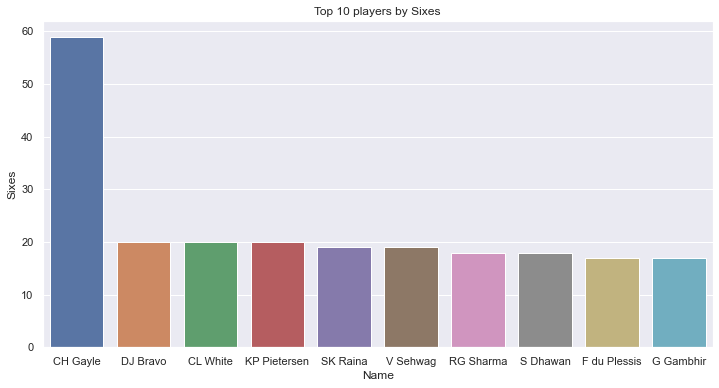

In [19]:
plt.figure(figsize=(12,6))
dataSports1=ipl_data.groupby('Name')['Sixes'].sum().sort_values(ascending = False ).head(10)
dataSports1= dataSports1.reset_index() 
dataSports1.columns = ['Name' ,'Sixes']
sns.barplot(data= dataSports1 , x= 'Name' , y ='Sixes')
plt.title("Top 10 players by Sixes");

- **CH Gayles hit more no of sixes (nealry 59) and rest of bats man in top ten hits on an average 18 to 20 fours.**

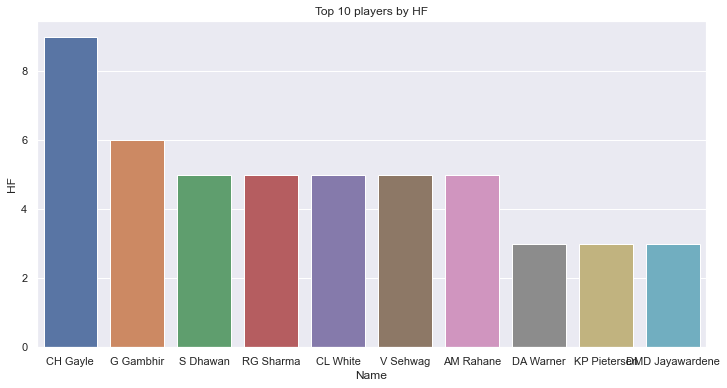

In [20]:
plt.figure(figsize=(12,6))
dataSports1=ipl_data.groupby('Name')['HF'].sum().sort_values(ascending = False ).head(10)
dataSports1= dataSports1.reset_index() 
dataSports1.columns = ['Name' ,'HF']
sns.barplot(data= dataSports1 , x= 'Name' , y ='HF')
plt.title("Top 10 players by HF");

- **CH Gales heats more no. of Half century followed by G Gambhir, S Ddhawan so on.**

### Note:
    From above analysis we observed the bats man score high run is high in most of attributes will little change in position between 1 to 5.

### Boxplot to check the outliers

In [21]:
#Box plot to check if any outliers in data
#define one fucniton to do box plot
def box_plot(data, columnlist):
    dataset = data
    column_list = columnlist
    length_columnlist = len(columnlist)
    
    #plot colors
    colors_list = ['lightgreen', 'lightblue', 'pink']
    
    if(length_columnlist > 3):
        length_columnlist = 3
    
    #plot the graph
    plt.figure(figsize=(15, 10))
    for i in range(length_columnlist):
        plt.subplot(3, 3, i+1)
        sns.boxplot(data= dataset, x = column_list[i], color = colors_list[i] )

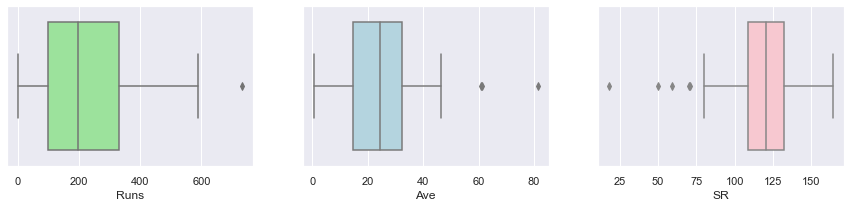

In [22]:
#box plot  
box_plot(ipl_data, ['Runs', 'Ave', 'SR'])

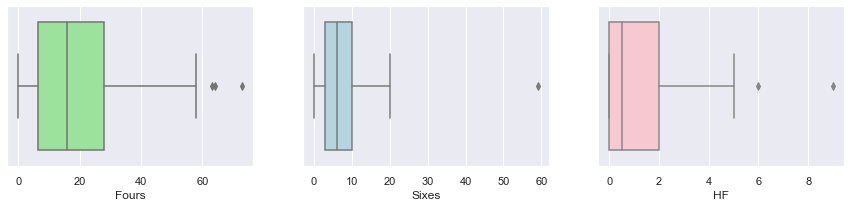

In [23]:
#box plot  
box_plot(ipl_data, ['Fours', 'Sixes', 'HF'])

### Observation:
- As we observed befor most of data have outliers. 

### Handle the outliers:
- Check and handle the outliers.
- Quantile-based Flooring and Capping techinque scale outliers. 

In [24]:
# define a function for identifying the outliers
def find_outliers(data, attribute):
    # sort the attribute
    data.sort_values(by=attribute)
    
    # quartile 25: indicates first quartile
    quartiles_25 = np.percentile(data[attribute], [25]) 
    
    # quartile 25: indicates first quartile
    min_val = min(data[attribute]) 
    max_val = min(data[attribute]) 
    
    # quartile 75: indicates third quartile
    quartiles_75 = np.percentile(data[attribute], [75])
    
    # inter quartile range
    IQR =  quartiles_75 - quartiles_25
    
    # find lower bound q1 - (1.5 *IQR)
    lower_fence = quartiles_25 - (1.5 * IQR)
    
    # find upper bound  q3 - (1.5 *IQR)
    upper_fence = quartiles_75  + (1.5 * IQR )
    print('')
    print ('Presense Of Outliers In ' + attribute.upper())
    print ('---------------------------')

    print (attribute + '     : quartile_75 : ', quartiles_75, 
           '\n'+ attribute+ ': quartile_25 : ', quartiles_25, 
           '\n'+ attribute+ ': IQR : ', IQR, 
           '\n'+ attribute+ ': lower_bound : ', lower_fence, 
           '\n'+ attribute+ ': upper_bound : ', upper_fence)
    
    print (attribute + ': Any data lower than : ', np.around(lower_fence, decimals = 2) , 
           ' and upper than :' , np.around(upper_fence, decimals = 2) , ' is considered as outlier')
    
    ##outliers
    upp_outlier = data[data[attribute].values > upper_fence][attribute]
    low_outlier = data[data[attribute].values < lower_fence][attribute]
    
    print('Outliers counts:',upp_outlier.count() + low_outlier.count())  
    
    #we can use Quantile-based Flooring and Capping techinque scale outliers
    quartiles_10 = np.percentile(data[attribute], [10])
    quartiles_97 = np.percentile(data[attribute], [97])
    data[attribute] = np.where(data[attribute].values < quartiles_10, quartiles_10, data[attribute])
    data[attribute] = np.where(data[attribute].values > quartiles_97, quartiles_97, data[attribute])

In [25]:
find_outliers(ipl_data,'Runs')
find_outliers(ipl_data,'Ave')
find_outliers(ipl_data,'SR')
find_outliers(ipl_data,'Fours')
find_outliers(ipl_data,'Sixes')
find_outliers(ipl_data,'HF')


Presense Of Outliers In RUNS
---------------------------
Runs     : quartile_75 :  [330.75] 
Runs: quartile_25 :  [98.] 
Runs: IQR :  [232.75] 
Runs: lower_bound :  [-251.125] 
Runs: upper_bound :  [679.875]
Runs: Any data lower than :  [-251.12]  and upper than : [679.88]  is considered as outlier
Outliers counts: 1

Presense Of Outliers In AVE
---------------------------
Ave     : quartile_75 :  [32.195] 
Ave: quartile_25 :  [14.665] 
Ave: IQR :  [17.53] 
Ave: lower_bound :  [-11.63] 
Ave: upper_bound :  [58.49]
Ave: Any data lower than :  [-11.63]  and upper than : [58.49]  is considered as outlier
Outliers counts: 3

Presense Of Outliers In SR
---------------------------
SR     : quartile_75 :  [131.9975] 
SR: quartile_25 :  [108.745] 
SR: IQR :  [23.2525] 
SR: lower_bound :  [73.86625] 
SR: upper_bound :  [166.87625]
SR: Any data lower than :  [73.87]  and upper than : [166.88]  is considered as outlier
Outliers counts: 5

Presense Of Outliers In FOURS
---------------------------

- **Handle the outliers base on quantile base floowing and chooping bease if we use mean or median it will impact the batsman ranking. Most of cases bats man with high score, the other parameters also higher. So to not imapct the batsman ranking i have replaced the postive outlies with 97 percentile and ive outliers with 10 percentile.**

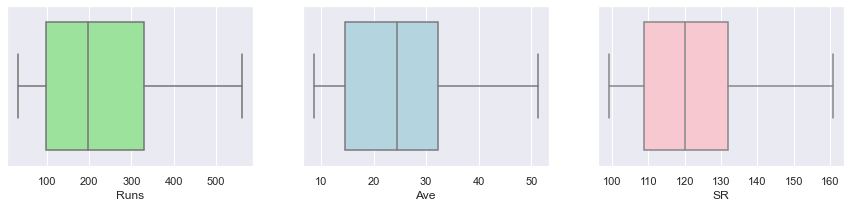

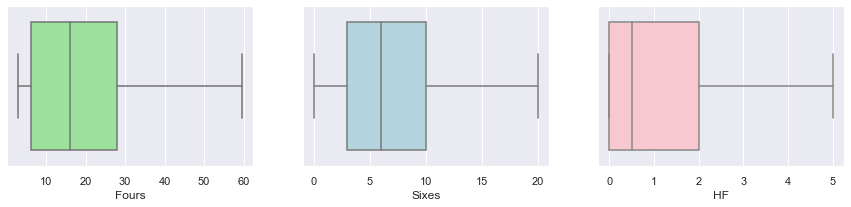

In [26]:
#box plot  
box_plot(ipl_data, ['Runs', 'Ave', 'SR'])
box_plot(ipl_data, ['Fours', 'Sixes', 'HF'])

- We can observe there is no outliers in data now.

In [27]:
#short the data descending order with respect to run .
ipl_data.sort_values('Runs', ascending = False).head(20)

,Name,Runs,Ave,SR,Fours,Sixes,HF
1,CH Gayle,562.97,51.1979,160.7400,46.00,20.0,5.0
9,S Dhawan,562.97,40.6400,129.6100,58.00,18.0,5.0
3,G Gambhir,562.97,36.8700,143.5500,59.65,17.0,5.0
11,AM Rahane,560.00,40.0000,129.3300,59.65,10.0,5.0
5,V Sehwag,495.00,33.0000,160.8621,57.00,19.0,5.0
7,CL White,479.00,43.5400,149.6800,41.00,20.0,5.0
39,R Dravid,462.00,28.8700,112.1300,59.65,4.0,2.0
33,SK Raina,441.00,25.9400,135.6900,36.00,19.0,1.0
15,RG Sharma,433.00,30.9200,126.6000,39.00,18.0,5.0
37,Mandeep Singh,432.00,27.0000,126.3100,53.00,7.0,2.0


- **As we can observed from data after handling outliers no impact on bats man order.**

In [28]:
#remove Name field and reset the index of the rows
ipl_data.reset_index(drop=True, inplace=True)
ipl_data_1 = ipl_data.drop('Name', axis=1)

In [29]:
### Keep one bakup of the data set
ipl_data_bk = ipl_data.copy()

- **Remove "Name" field from the data since this feild not add any value to predict the player ranking.**

## Multivariate Analysi

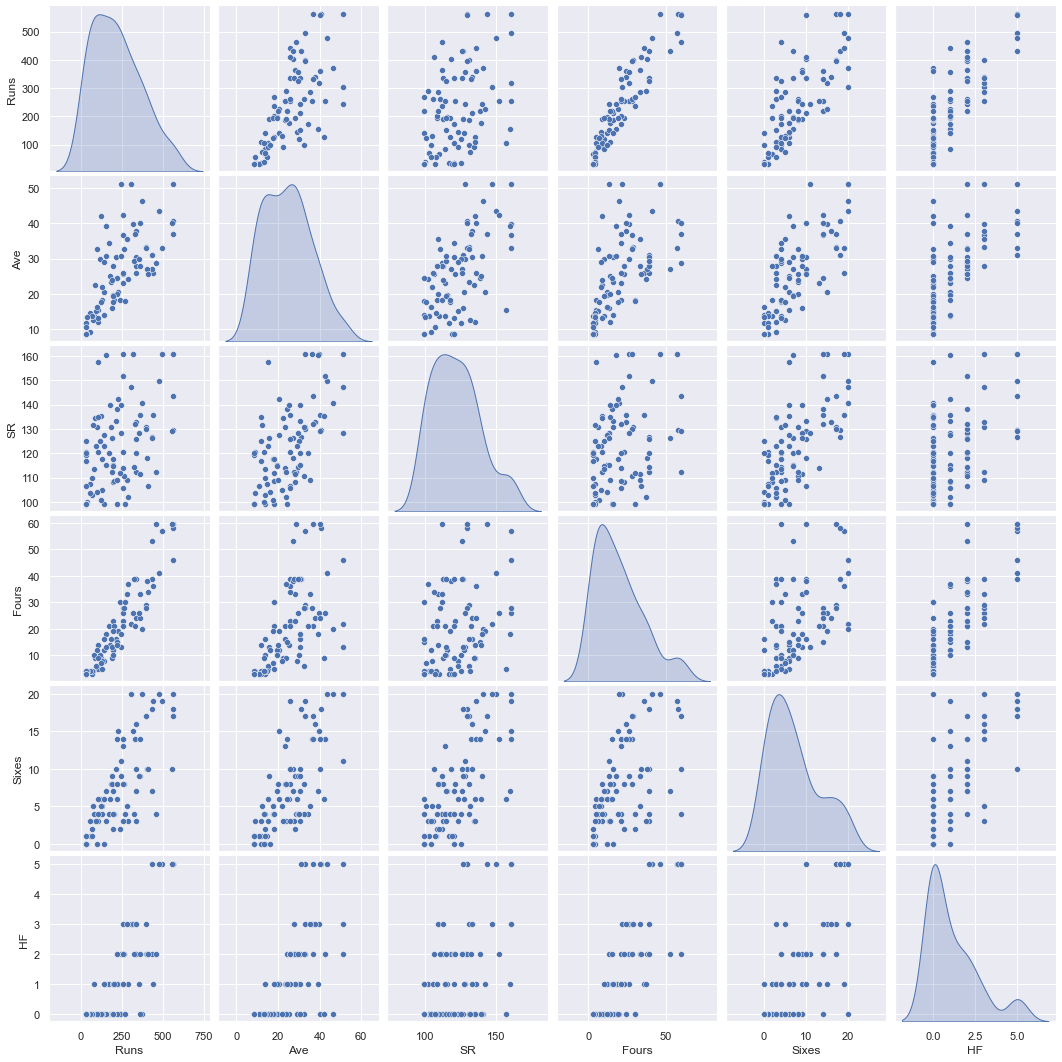

In [30]:
# to plot density curve [diag_kind='kde'] instead of histogram
sns.pairplot(ipl_data_1, diag_kind='kde')   # to plot density curve instead of histogram

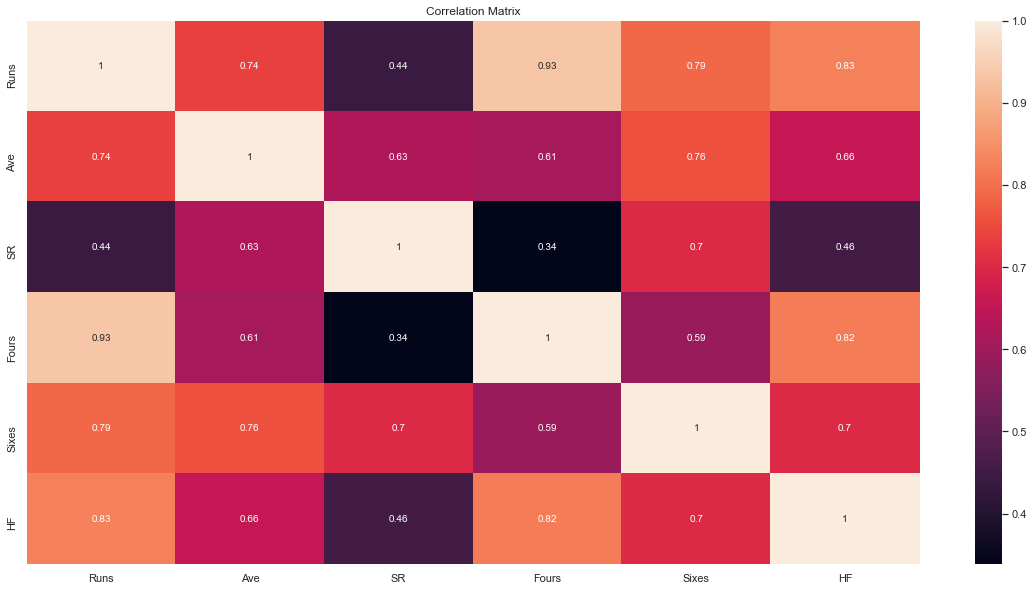

In [31]:
#check the correlation matrix
corr = ipl_data_1.corr()

#Heatmap for correlation matrix
fig, ax = plt.subplots(figsize=(20,10))
plt.title('Correlation Matrix')
sns.heatmap(corr, annot=True, ax=ax);

- As we can see from pair plot and correlation matrix ther is high correlation between Runs, Fours, HF.
- Sicne we are only ranking the players no need to do more analysis and remove the correlated attributes. Will be applying PCA base on that we ll decide the dimention reduction.

## Apply Feature Scaling

In [32]:

# Since the data have different scale. apply standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(ipl_data_1)
ipl_data_sd = pd.DataFrame(scaled_data, columns= ipl_data_1.columns)

- **Since data have differnt different scale, so standard scaller applied to scale the data.**

In [33]:
#Data after scalling
ipl_data_sd.head()

,Runs,Ave,SR,Fours,Sixes,HF
0,2.335255,2.361315,2.290256,1.700472,2.158939,2.604277
1,2.335255,1.090587,1.274529,2.584137,1.655124,2.604277
2,1.873575,0.747360,2.297471,2.412583,1.991001,2.604277
3,1.764896,1.682143,1.636740,1.376785,2.158939,2.604277
4,2.335255,1.424945,0.450839,2.477321,1.823063,2.604277


## Dimensional reduction:

In [34]:
#Covariance Matrix
covMatrix = np.cov(ipl_data_sd.T) #or we can write like np.cov(ipl_data_sd.T) 
print('Shape:' ,covMatrix.shape, '\n')
print(covMatrix)

Shape: (6, 6) 

[[1.01123596 0.74562991 0.44565862 0.94496238 0.79699392 0.83542227]
 [0.74562991 1.01123596 0.63390357 0.61837947 0.76682083 0.66441269]
 [0.44565862 0.63390357 1.01123596 0.34196833 0.70944736 0.46083973]
 [0.94496238 0.61837947 0.34196833 1.01123596 0.5985612  0.8294442 ]
 [0.79699392 0.76682083 0.70944736 0.5985612  1.01123596 0.70822787]
 [0.83542227 0.66441269 0.46083973 0.8294442  0.70822787 1.01123596]]


In [35]:
##Apply PCA on all atributes
pca = PCA(n_components = 6)
pca.fit(ipl_data_sd)

PCA(n_components=6)

In [36]:
#eigenvalue
eigen_val = pca.explained_variance_
print(eigen_val) 

[4.41444638 0.90139247 0.30196392 0.23022956 0.20221828 0.01716512]


In [37]:
#eigenvector
eigen_vec = pca.components_
print(eigen_vec)

[[ 4.48887827e-01  4.10802310e-01  3.22109075e-01  4.09224333e-01
   4.24657204e-01  4.22123950e-01]
 [ 2.90840235e-01 -2.19027544e-01 -7.06568665e-01  4.75349230e-01
  -2.74635035e-01  2.58492402e-01]
 [-7.33079971e-02 -7.88856874e-01  4.64190872e-01  1.60382881e-01
  -2.51368350e-02  3.61252095e-01]
 [-1.70505332e-01  3.49496372e-01  3.56694177e-01  2.90107913e-01
  -7.93695013e-01  8.62270615e-02]
 [ 3.71194505e-01 -1.84785025e-01  2.06856090e-01  4.19894515e-01
   5.52165422e-04 -7.80364007e-01]
 [ 7.35989257e-01 -6.84106050e-02  1.07299218e-01 -5.66022863e-01
  -3.37131898e-01  8.99270997e-02]]


- **The first principal component as the general-batting-performance-index, which is a type of weighted 
average of all six variables used. Here, the coefficients of the first principal component are all 
positive.**

In [38]:
#percentage of variance explained by eigen vector
per_vaiance = pca.explained_variance_ratio_
print(per_vaiance)

[0.72756616 0.14856283 0.04976813 0.03794524 0.03332857 0.00282907]


- **Almost 71% total Variability can be explained by this first principal component.**

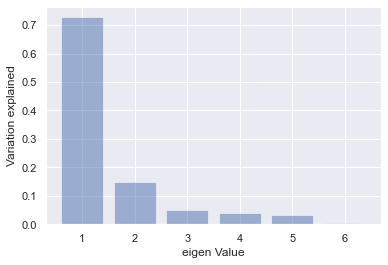

In [39]:
##Variance explained by the variables
plt.bar(list(range(1,7)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

Text(0.5, 0, 'eigen Value')

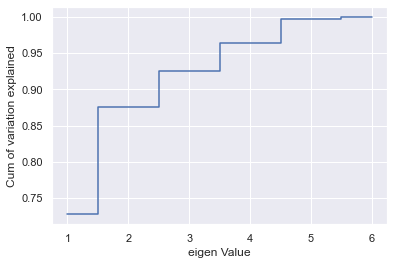

In [40]:
plt.xlabel('eigen Value')
plt.step(list(range(1,7)),np.cumsum(per_vaiance), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')

- So if we consider 5 variables, it capture 99% of the variance in data.
- So we ll consider first 5 featue to randk the players based on the eigen value and eigen vector.

Dimention explain 99% Variation in data: 5
[0.72756616 0.876129   0.92589712 0.96384237 0.99717093 1.        ]


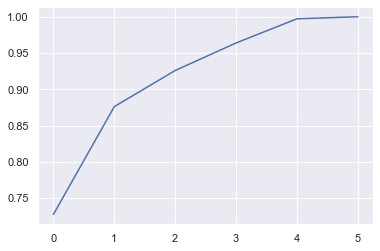

In [41]:
cumsum = np.cumsum(per_vaiance)
decom_dim = np.argmax(cumsum >= 0.99) + 1
print('Dimention explain 99% Variation in data:',decom_dim)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
print(np.cumsum(pca.explained_variance_ratio_))

In [42]:
# PC selection
def zerolistmaker(n):
    listofzeros = [0] * n
    return listofzeros

a=zerolistmaker(len(eigen_val))
eig_tot=sum(eigen_val)    # sum eigen values

print("Variance captured by PCs")

for i in range(0 , len(eigen_val)):     
     a[i]=round(((100 * eigen_val[i]/eig_tot) + a[i-1]),1)
     print("\tPC",i+1,":",a[i],"%") 

Variance captured by PCs
	PC 1 : 72.8 %
	PC 2 : 87.7 %
	PC 3 : 92.7 %
	PC 4 : 96.5 %
	PC 5 : 99.8 %
	PC 6 : 100.1 %


- **As we can see with 5 featue we can explain 99% of variation in data. so we ll reduce the dimention to 5.**

## Ranking Player

In [43]:
#take 5 attributes, since with 5 attributes we can get 99.8% variance in data
# sum all the eigen value and muliply with eigen vector to capture the variance

#lenght of eigen val - 1 (since we are taking 5 featrues)
len_eig_val = len(eigen_val) - 1 

#ceate emptylist with index size 5
import math
def zerolistmaker(n):
    listofzeros = [0] * n
    return listofzeros

b =zerolistmaker(len_eig_val)
b1 =zerolistmaker(len_eig_val)
b2 =zerolistmaker(len_eig_val)
b3 =zerolistmaker(len_eig_val)
b4 =zerolistmaker(len_eig_val)
b5 =zerolistmaker(len_eig_val)

In [44]:
#define one function to calculate multipy the sqr of eigen value of first five feature with first five eigen vector
def modified_egvec(eigen_v, lst):
    for i in range(0, len_eig_val):
        lst[i]=eigen_v[i] * math.sqrt(eigen_val[i])
    return lst

In [45]:
# vec 1
eigen_v1 = eigen_vec[:,0]
b1 = modified_egvec(eigen_v1, b1)

# vec 2
eigen_v2 = eigen_vec[:,1]
b2 = modified_egvec(eigen_v2, b2)

# vec 3
eigen_v3 = eigen_vec[:,2]
b3 = modified_egvec(eigen_v3, b3)

# vec 4
eigen_v4 = eigen_vec[:,3]
b4 = modified_egvec(eigen_v4, b4)

# vec 5
eigen_v5 = eigen_vec[:,4]
b5 = modified_egvec(eigen_v5, b5)

In [46]:
for i in range(0, len_eig_val):
    b[i] = b1[i] + b2[i] + b3[i] + b4[i]+b5[i]
    
print("Final Vector:",b)

Final Vector: [4.235062959478403, -0.4120866047217213, -0.14437227748741918, 0.015401396646525511, 0.3659157148234766]


- **Final vector create based on the 99% of variation exaplained, what we got during PCA.**
- **Now we ll multipy this vector with all bats man data to do the ranking.**

In [47]:
#convert vector b to array
z = np.array(b)
print(z)

[ 4.23506296 -0.4120866  -0.14437228  0.0154014   0.36591571]


In [48]:
##Apply PCA ro get 5 variables as we saw above with 5 variables it can explain 99%
pca_5 = PCA(n_components = 5)
pca_5.fit(ipl_data_sd)
ipl_data_pca_sd = pca_5.transform(ipl_data_sd)

In [49]:
#multiply the array with each variable to get the ranking index or each bats man
ipl_data_bk['Ranking_Index'] = np.matmul(ipl_data_pca_sd, z.T) + 1

In [50]:
#Rank the players
ipl_data_sorted = ipl_data_bk.sort_values('Ranking_Index', ascending = False)
ipl_data_sorted['Rank'] = ipl_data_sorted.index + 1

In [51]:
ipl_data_sorted.head()

,Name,Runs,Ave,SR,Fours,Sixes,HF,Ranking_Index,Rank
0,CH Gayle,562.97,51.1979,160.7400,46.00,20.0,5.0,24.216911,1
2,V Sehwag,495.00,33.0000,160.8621,57.00,19.0,5.0,21.174402,3
1,G Gambhir,562.97,36.8700,143.5500,59.65,17.0,5.0,20.648810,2
3,CL White,479.00,43.5400,149.6800,41.00,20.0,5.0,20.208683,4
4,S Dhawan,562.97,40.6400,129.6100,58.00,18.0,5.0,20.043836,5


In [52]:
#export the data to working directory
ipl_data_sorted.to_csv("ipl_final_dn.csv", index= False)

## Conclusion:
- As we can see from above data the ranking done based on the all the variability factor.
- Also we can see the ranking mostly accurate. As for initial analysi based on run, avg CH Gayle is the first rank followed by V shehwag,G Gambhir so on.